<center><b><font size="6"> Heart Failure Dataset: </br> </br> Exploratory Data Analysis & Prediction </b></font></center>

</br>

###   1. Import libraries

In [2]:
import numpy as np # Linear algebra
import pandas as pd # Data manipulation
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualization
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , learning_curve , RandomizedSearchCV , GridSearchCV
from sklearn.feature_selection import SelectKBest #select the best features 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report # Evaluation metrics

### 2. Load the dataset 

In [2]:
# Read the dataset from CVS file
data = pd.read_csv('heart.csv')

# Check if the  dataset was loaded correctly  
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


### 3. Exploratory Data Analysis (EDA)

In [29]:
# create a copy of the dataset for the EDA part 
df = data.copy()

### 3.1 Form Analysis

In [5]:
# Dataset dimensions
df.shape

(918, 12)

In [6]:
# Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
# NaN values 
df.isnull().sum().sum()

0

In [24]:
# Duplicated data
df.duplicated().sum()

0

 </br>

### 3.2 Deep Analysis

In [14]:
# Columns names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [20]:
# Target values 
df['HeartDisease'].value_counts(normalize= True ) * 100

1    55.337691
0    44.662309
Name: HeartDisease, dtype: float64

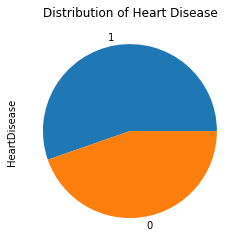

In [104]:
# Target visualisation
df['HeartDisease'].value_counts().plot.pie()

# Add a title 
plt.title('Distribution of Heart Disease')

# Display the graphic
plt.show()

In [4]:
# Seperate the numerical from the categorical columns 
numerical_df=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_df =['Sex','FastingBS', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope','HeartDisease']

In [67]:
# Numerical columns
numerical_df

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [66]:
#Categorical columns 
categorical_df

['Sex',
 'FastingBS',
 'ChestPainType',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [10]:
#Description of the dataset: min value , max value , average value etc...
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

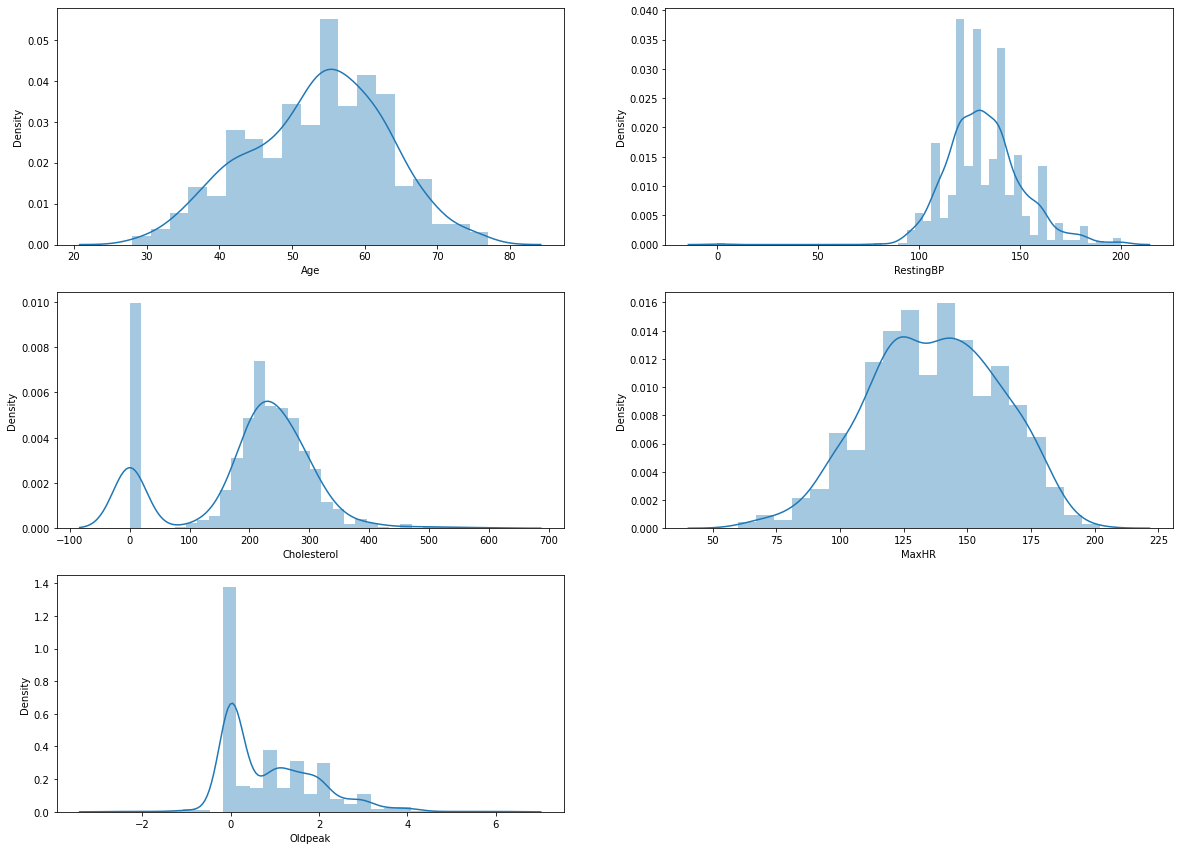

In [65]:
# Continuous features
plt.figure(figsize = (20,20))
for i , col in enumerate(numerical_df):
    plt.subplot(4,2, i+1)
    sns.distplot(df[col])

plt.show()
  

In [26]:
#Feature engineering
def max_hr_supposed(age):
    
    if age <66:
        return 220 - age
    else:
        return 208 - (0.7 * age)

In [30]:
#  Create a new column containing the maximum heart rate that should be achieved
df['True_max_hr'] = np.zeros((df.shape[0] , 1))
df['True_max_hr'] = df['Age'].apply(max_hr_supposed)


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'True_max_hr')

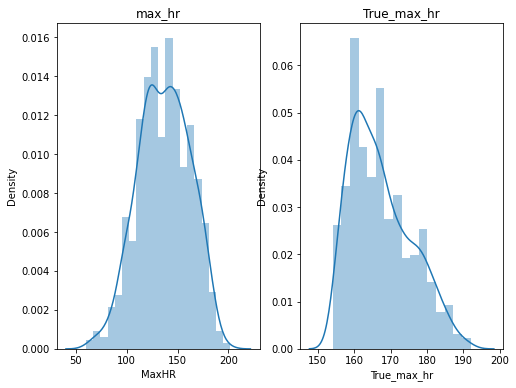

In [47]:
# Maximum heart rate achieved vs Maximum heart rate should be achieved
plt.figure(figsize = (8,6))
plt.subplot(1,2, 1)
sns.distplot(df['MaxHR'])
plt.title('max_hr')

plt.subplot(1,2, 2)
sns.distplot(df['True_max_hr'])
plt.title('True_max_hr')


In [102]:
# Categorical values
for col in categorical_df:         
     print("{:-<50}  {}".format(col, df[col].unique() ) )


Sex-----------------------------------------------  ['M' 'F']
FastingBS-----------------------------------------  [0 1]
ChestPainType-------------------------------------  ['ATA' 'NAP' 'ASY' 'TA']
RestingECG----------------------------------------  ['Normal' 'ST' 'LVH']
ExerciseAngina------------------------------------  ['N' 'Y']
ST_Slope------------------------------------------  ['Up' 'Flat' 'Down']
HeartDisease--------------------------------------  [0 1]


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-p

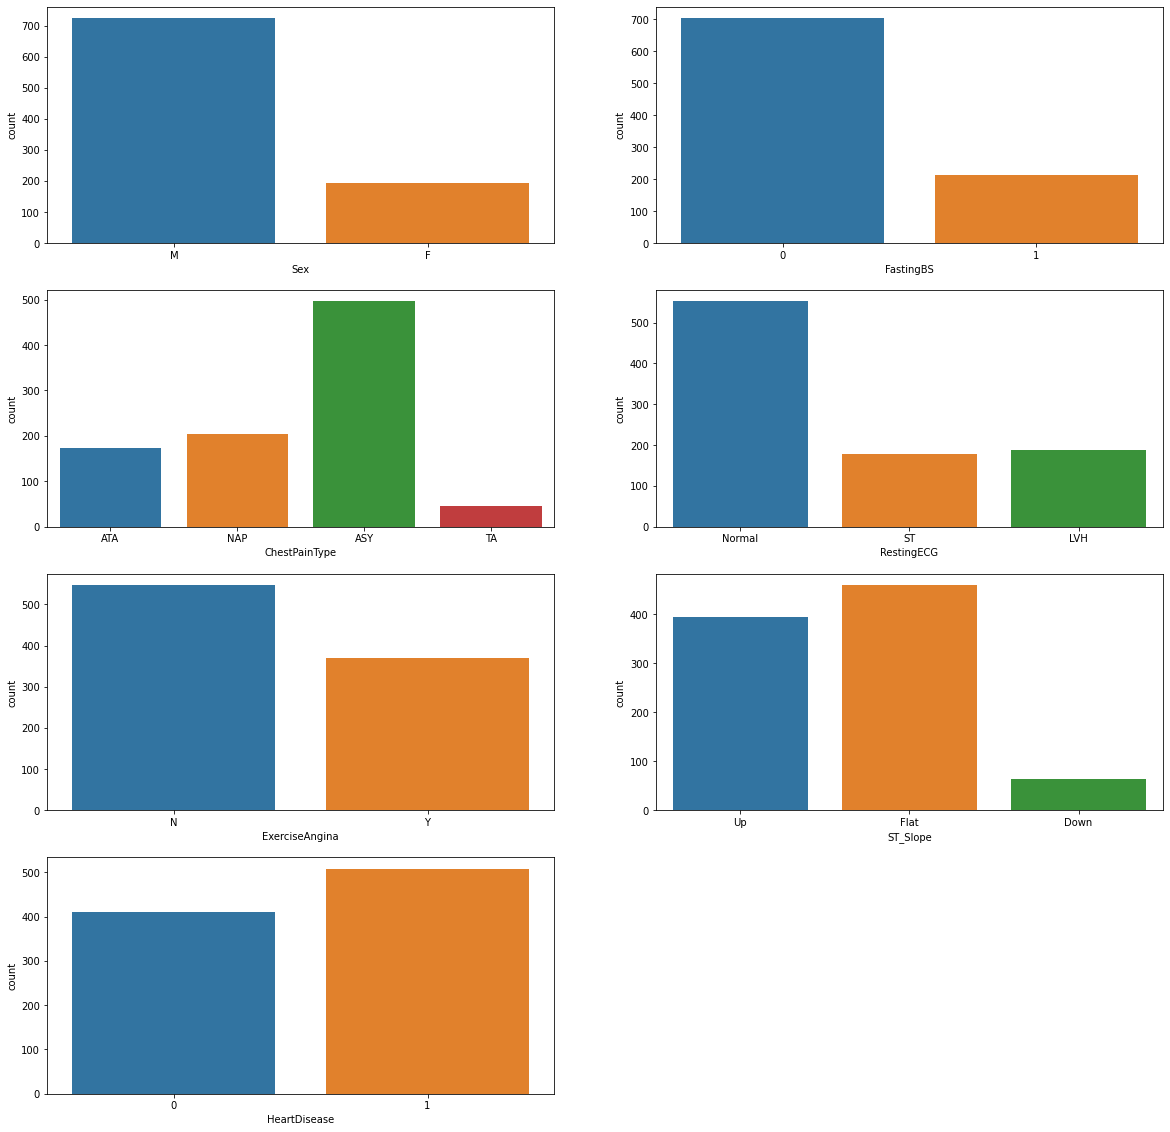

In [115]:
# Categorical features
plt.figure(figsize = (20,20))
for i , col in enumerate(categorical_df):
    plt.subplot(4,2, i+1)
   # sns.barplot(df[col].value_counts().index, df[col].value_counts())
    sns.countplot(df[col])

plt.show()



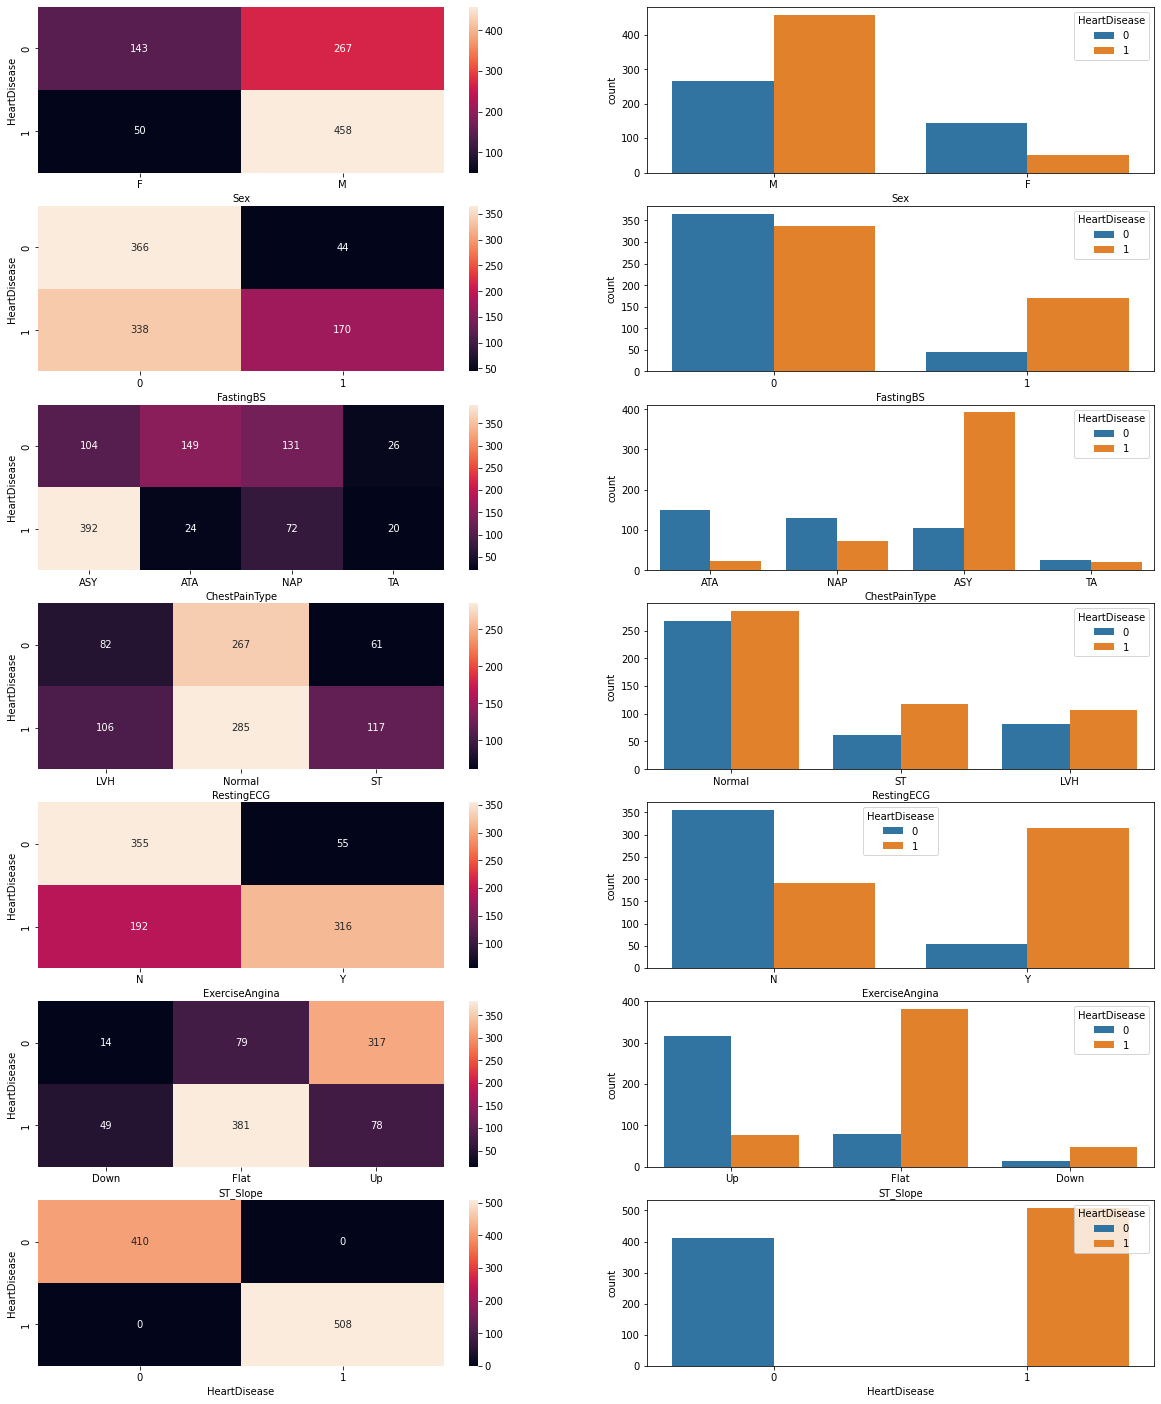

In [5]:
#Categorical / target relationship

plt.figure(figsize = (20, 25))
pos = 0

for col in categorical_df:
   # the first graphic: heatmap  
   pos = pos+1
   plt.subplot(7,2,pos)
   sns.heatmap(pd.crosstab(df['HeartDisease'] , df[col]) , annot=True , fmt='d')
   
   # the second graphic : countplot 
   pos = pos+1
   plt.subplot(7,2 , pos)
   sns.countplot(x = col , hue='HeartDisease' , data=df)
    
plt.show() 

In [9]:
# Create two sub datasets: normal and HeartDisease 
normal_df = df[ df['HeartDisease'] ==0]
heartdisease_df = df[ df['HeartDisease'] ==1]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

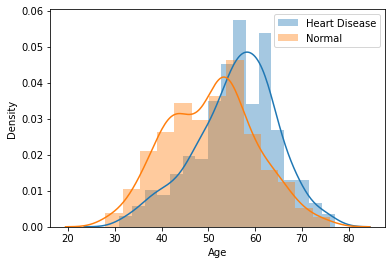

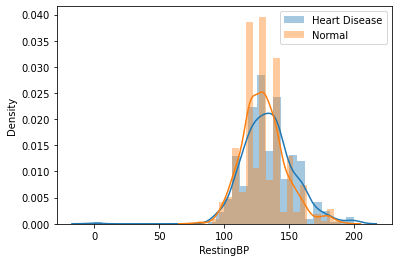

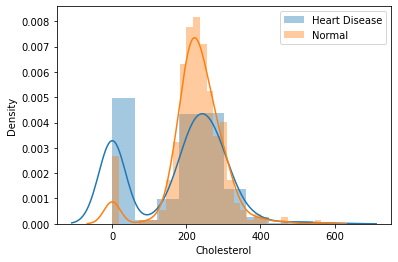

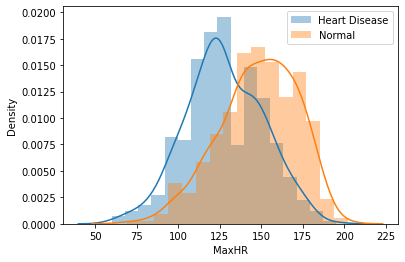

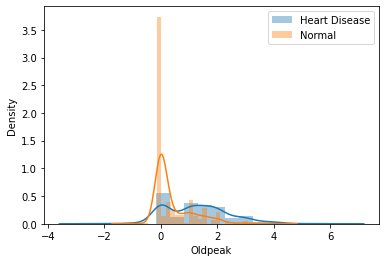

In [13]:
# Continuous / Target Relationship
for col in numerical_df:
    plt.figure()
    sns.distplot(heartdisease_df[col] , label='Heart Disease')
    sns.distplot(normal_df[col] , label = 'Normal')
    plt.legend()
 

<Axes: xlabel='Age', ylabel='count'>

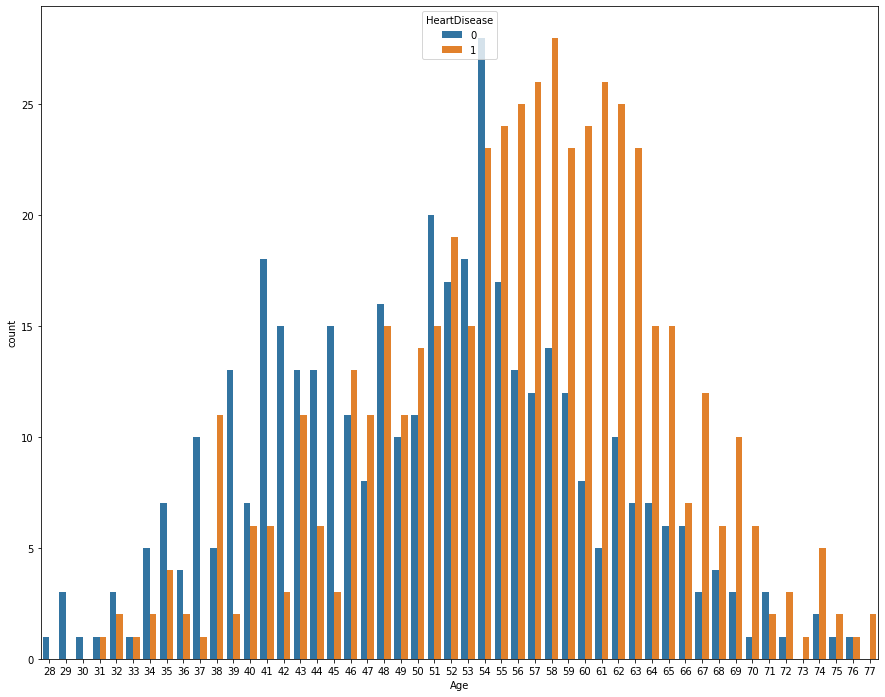

In [17]:
# Age / Target relationship
plt.figure(figsize  = (15,12))
sns.countplot(x = 'Age'  , hue='HeartDisease' , data=df) 

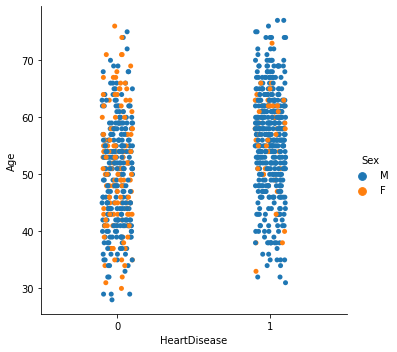

In [19]:
# Age / Target relationship 
sns.catplot(x ='HeartDisease' , y = 'Age' , data = df , hue='Sex')  

<Axes: xlabel='HeartDisease', ylabel='Age'>

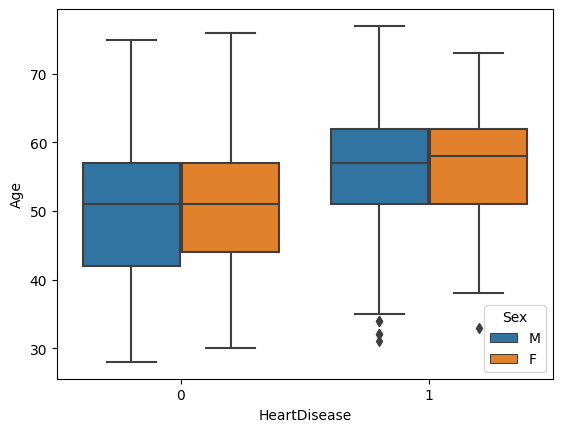

In [17]:
# Detect outliers
sns.boxplot(data = df , x = 'HeartDisease',y = 'Age' , hue='Sex')

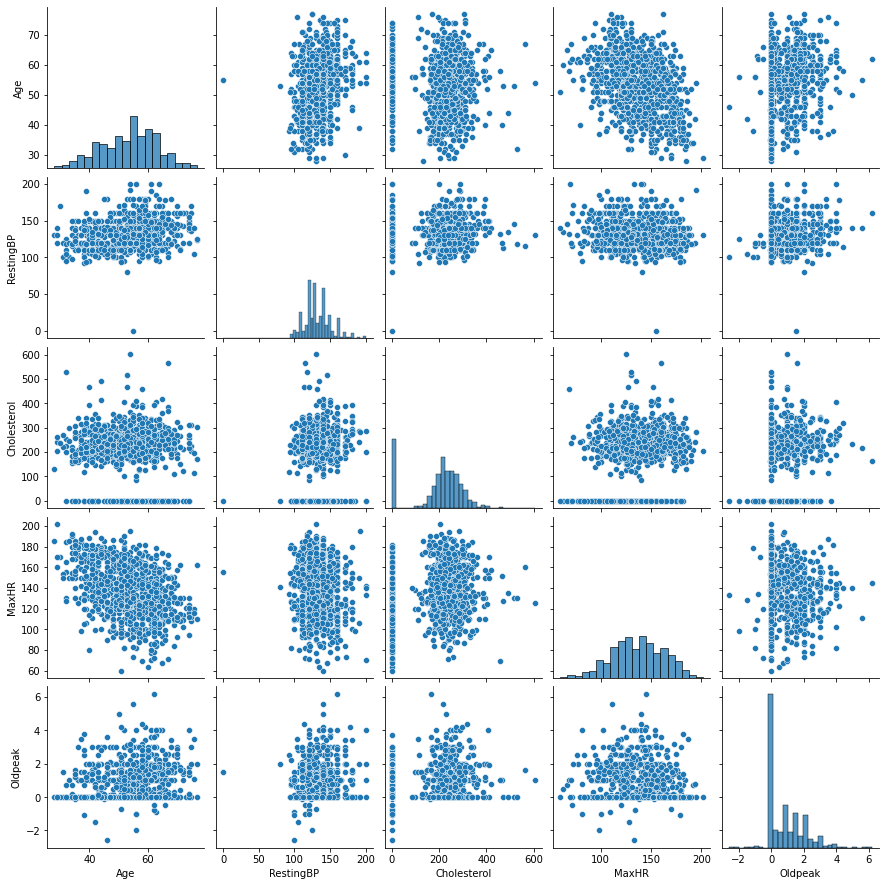

In [5]:
# Correlation  between all the variables of the dataset using pairplot
sns.pairplot(df[numerical_df])

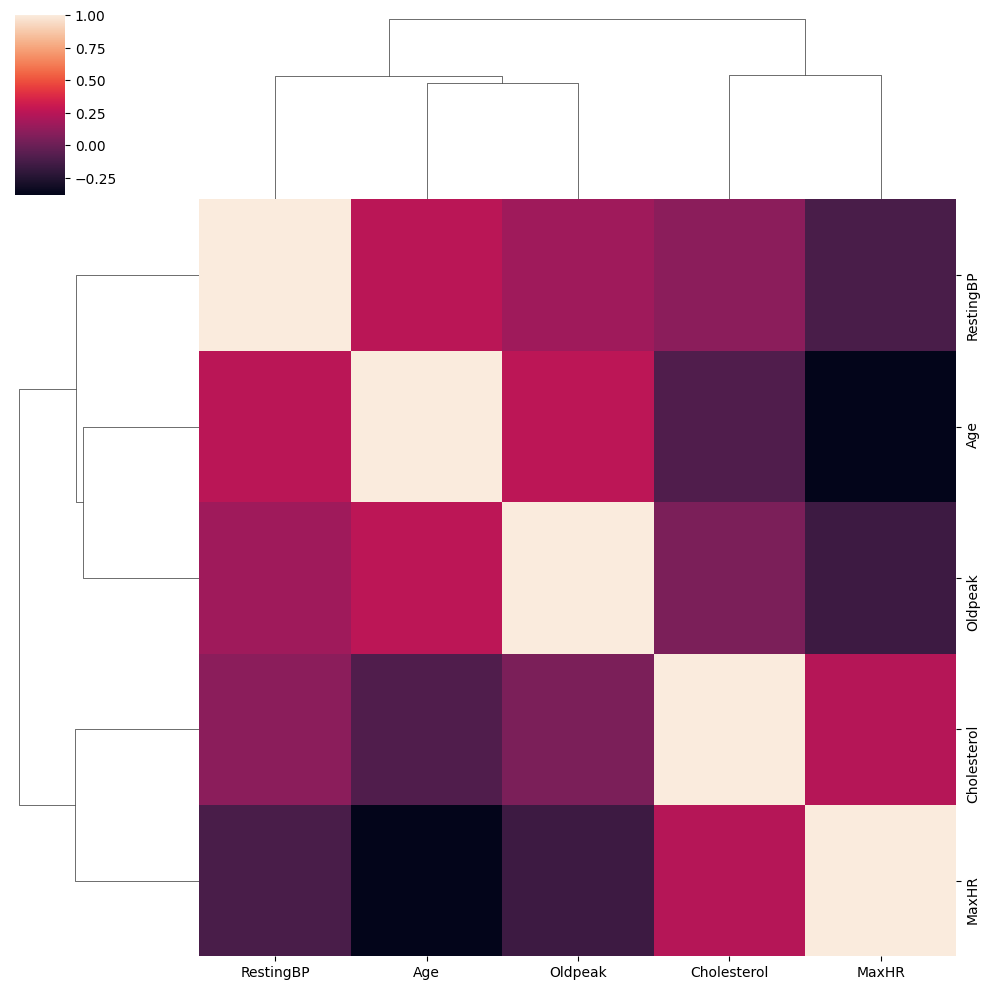

In [6]:
# Using clustermap
sns.clustermap(df[numerical_df].corr())

<Axes: >

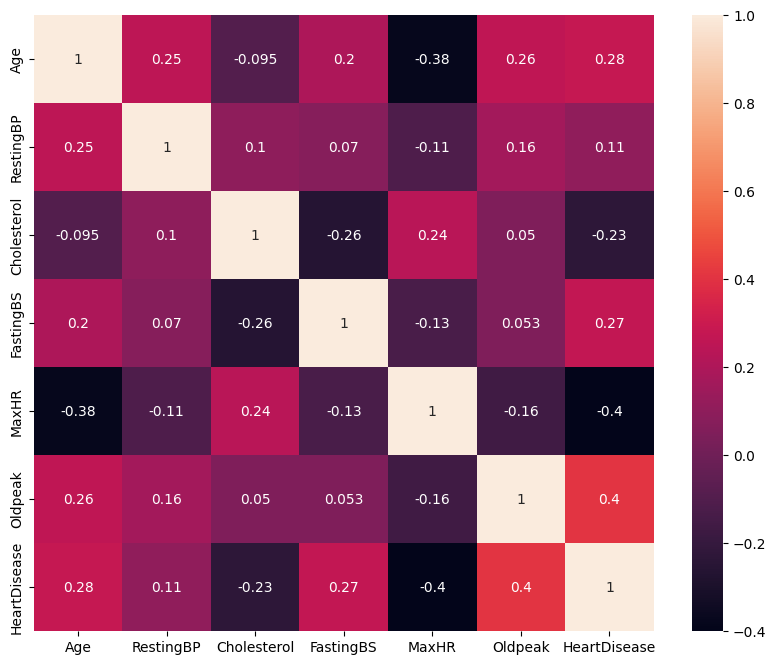

In [16]:
# Using heatmap
plt.figure(figsize  =(10,8))
sns.heatmap(df.corr() , annot=True)

</br>

# <b>Form Analysis:</b>

    - Target variable: HeartDisease

    - Rows and columns: (918, 12)

    - data types: float64(1), int64(6), object(5)

    - Missing values analysis: no duplicated or missing values

</br>

# <b>Deep Analysis:</b>

    - Understanding the meaning of variables:
    
    
      ****************************************************************************************************
    
       Age -               Age of the patient [years]

       Sex -               Sex of the patient  [M: Male, F: Female]

       ChestPainType -     Chest pain types [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal 
                           Pain, ASY: Asymptomatic]

       RestingBP -         Resting blood pressure [mmHg]

       Cholesterol -       Serum cholestoral [mg/dL]

       FastingBS -         Fasting blood sugar [1: if FastingBS > 120 mg/dl,   0: otherwise]
       
       RestingECG-         Resting electrocardiographic results[Normal: Normal, ST: having ST-T wave 
                           abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
                           LVH: showing probable or definite left ventricular hypertrophy byEstes'criteria]
       
       MaxHR -             Maximum heart rate achieved [bpm: beats per minute],Numeric value between 60 and
                           202
        
       ExerciseAngina -    Exercise-induced angina [Y: Yes, N: No]
        
       Oldpeak -           ST Numeric value measured in depression
        
       ST_Slope -          The slope of the peak exercise ST segment
        
       HeartDisease -      [Our Target] there are two classes [1: heart disease, 0: Normal]
       
       ****************************************************************************************************
       
        
    - Target variables: 
    
    
       ****************************************************************************************************
            
       45% Normal , 55% Heart disease --> a Balanced dataset
           
       ****************************************************************************************************

    
    - Continuous variables : 
    
    
       ****************************************************************************************************
            
       Only age and maxHR follow a normal distribution. All the patients are between the ages of 28 and 77 
       years. Some variables like Cholesterol, MaxHR , RestingBP can be standardized later. The majority of 
       patients have high blood pressure(By conducting research on the internet, I found that normal blood 
       pressure is  typically considered to be below 80 mmHg). There are many types of cholesterol. In the
       given dataset, the authors do not mention which type specifically. However, elevated levels of 
       cholesterol, particularly LDL cholesterol (referred to as "bad cholesterol"),can heighten the risk of
       heart disease.Many sick patients have a normal blood sugar level(FastingBS).
           
       ****************************************************************************************************
    

    - Categorical variables:
    
    
       ****************************************************************************************************
               
       The majority of patients are male (almost three times as many). The rate of patients experiencing
       chest pain or discomfort during physical activity is high. 
       
       ****************************************************************************************************
    

    - Continuous / Target  relationship:  
    
    
       ****************************************************************************************************
          
       It appears that patients with heart disease have a different Maximum Heart Rate achieved (MaxHR)
       compared to normal patients (generally lower).
           
       ****************************************************************************************************
 
  
    - Categorical / Target relationship : 
    
    
       ****************************************************************************************************
          
       Age /Target: There appears to be a correlation between age and the presence of heart diseases, 
                     especially in patients over the age of 55. Correlation rate  between heartDisease & age 
                     is 0.28. The majority of patient with heart disease are aged between 55 and 65, with the
                     exception of a young  girl and 3 men over the age of 30(4 outliers)
                      
       Sex/Target: The majority  of male patients have a  heart disease. 
       
       ExerciseAngina /target: Pain or a sensation of tightness or pressure in the chest that occurs during
                               exercise is considered as symptoms of heart disease. 
                               
       ChestPainType /Target: The majority of patients who have  heart disease has silent  chest pain (chest
                              pain with without symptoms) 
                              
       FastingBS /Target  : Based on the heatmap analysis, we can conclude that fasting blood sugar
                            (fastingBS)is not the main factor contributing to the presence of heart disease.
                            The correlation rate between Fasting BS and our target is 0.27.
       
       oldPeak /Target: The correlation rate wetween oldPeak and our target  is 0.4           
                          
       ****************************************************************************************************
         

             

</br>

### 4. Preprocessing

In [3]:
# Create a copy of the dataset for the EDA part 
df1 = data.copy()

In [4]:
# Trainset , Testset
trainset, testset = train_test_split(df1 , test_size = 0.2 , random_state=0)

In [5]:
print('trainset dimensions' , trainset.shape)
print('testset dimensions' , testset.shape)

trainset dimensions (734, 12)
testset dimensions (184, 12)


In [6]:
# check if the trainset is  balanced 
trainset['HeartDisease'].value_counts()

1    401
0    333
Name: HeartDisease, dtype: int64

In [7]:
# check if the testset is  balanced 
testset['HeartDisease'].value_counts()

1    107
0     77
Name: HeartDisease, dtype: int64

In [8]:
# Encodage function 
def encodage(data):
    
    code = { # sex code
            'M':1,
            'F':0,
            # ExerciseAngina code
            'N':0,
            'Y':1,         
            #RestingECG code
            'Normal':0,
            'ST':1,
            'LVH':2,
            # ChestPainType code
            'ATA':0,
            'NAP':1,
            'ASY':2,
            'TA':3,
            # ST_Slope code
            'Down':0,
            'Flat':1,
            'Up':2
            
                 
    }
    
    for col in data.select_dtypes(include='object'):
      data[col] = data[col].map(code)
        
    return data
    

In [9]:
def preprocessing (data):
    
    data = encodage(data)
    x = data.drop('HeartDisease' , axis = 1)
    y= data['HeartDisease']
    
    return x, y
    

In [10]:
x_train , y_train = preprocessing (trainset)
x_test , y_test = preprocessing (testset)

In [11]:
# check dimensions 
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (734, 11)
x_test:  (184, 11)
y_train:  (734,)
y_test:  (184,)


</br>

# 4. Modelling

In [134]:
# Models
kneighbors = make_pipeline(SelectKBest(k=8),MinMaxScaler(), 
                           KNeighborsClassifier())

log_reg = make_pipeline(SelectKBest(k=8), MinMaxScaler(), 
                        LogisticRegression(random_state = 0))

svc = make_pipeline(SelectKBest(k=8),MinMaxScaler(),
                    SVC(random_state = 0))

sgd= make_pipeline(SelectKBest(k=8),MinMaxScaler(),
                   SGDClassifier())


# Dictionary of models
models = {
             'KNeighborsClassifier':kneighbors,
             'LogisticRegression': log_reg,
             'SVC':svc,
             'SGDClassifier':sgd
    
}



In [135]:
def evaluation(model):
    
    # Train the model
    model.fit(x_train , y_train)
    
    # Test the model
    y_preds = model.predict(x_test)
    
    # Accuracy score
    print('accuracy_score:' , accuracy_score(y_test , y_preds))
    
    # Confusion_matrix
    print(confusion_matrix(y_test , y_preds))
    
    # Classification_report
    print(classification_report(y_test , y_preds))
    
    # Learning curve
    n ,train_scores, val_scores = learning_curve(model, x_train , y_train , cv= 4 , train_sizes = np.linspace(0.1 , 1 , 10))
    
    # Plot learning curve
    plt.figure(figsize = (10,8))
    plt.plot(n,train_scores.mean(axis=1) , label='Train-Curve')
    plt.plot(n,val_scores.mean(axis = 1) ,label='Val-Curve')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title('Leanring Curve')
    plt.legend()
    plt.show()
    

KNeighborsClassifier
accuracy_score: 0.842391304347826
[[60 17]
 [12 95]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



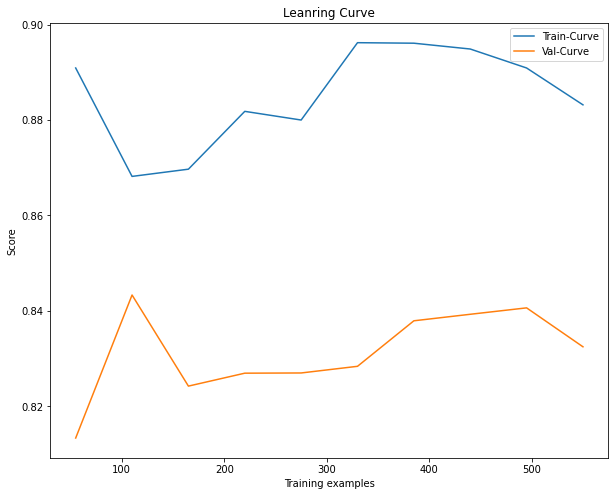

LogisticRegression
accuracy_score: 0.8369565217391305
[[59 18]
 [12 95]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



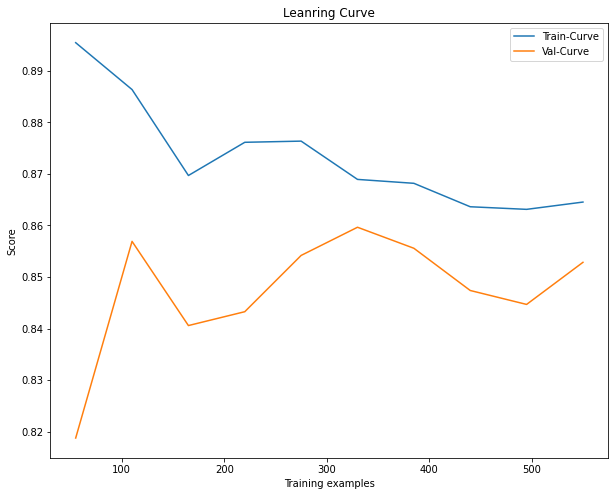

SVC
accuracy_score: 0.842391304347826
[[58 19]
 [10 97]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        77
           1       0.84      0.91      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



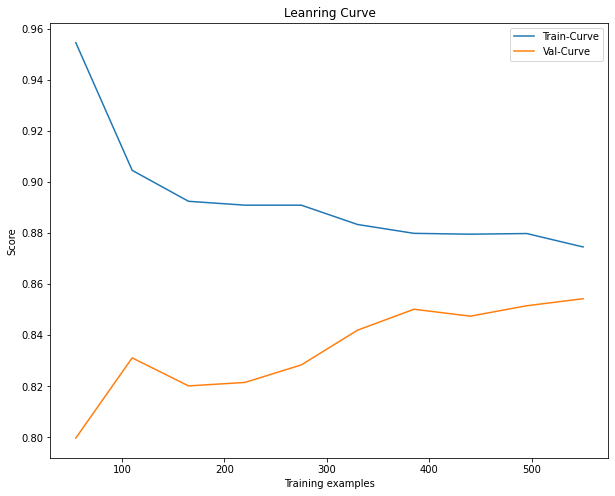

SGDClassifier
accuracy_score: 0.6793478260869565
[[70  7]
 [52 55]]
              precision    recall  f1-score   support

           0       0.57      0.91      0.70        77
           1       0.89      0.51      0.65       107

    accuracy                           0.68       184
   macro avg       0.73      0.71      0.68       184
weighted avg       0.76      0.68      0.67       184



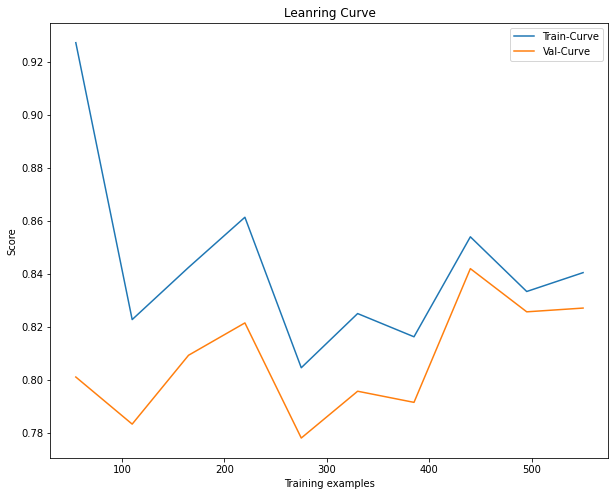

In [136]:
for name, model in models.items():
    print(name)
    evaluation(model)

# 5. Optimization

In [152]:

hyper_params = {
    'selectkbest__k': range(2,12),
    'svc__C': [0.1,1, 10 , 100 ],
    'svc__gamma': [1 , 0.1, 0.01,0.001]    
    
}



In [153]:
random_grid = RandomizedSearchCV(svc , hyper_params , n_iter=60, cv= 4  )
random_grid.fit(x_train , y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=8)),
                                             ('minmaxscaler', MinMaxScaler()),
                                             ('svc', SVC(random_state=0))]),
                   n_iter=60,
                   param_distributions={'selectkbest__k': range(2, 12),
                                        'svc__C': [0.1, 1, 10, 100],
                                        'svc__gamma': [1, 0.1, 0.01, 0.001]})

In [154]:
# get the best parameters
random_grid.best_params_

{'svc__gamma': 0.1, 'svc__C': 1, 'selectkbest__k': 9}

In [155]:
# get the best model
estimator= random_grid.best_estimator_

accuracy_score: 0.8532608695652174
[[60 17]
 [10 97]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        77
           1       0.85      0.91      0.88       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



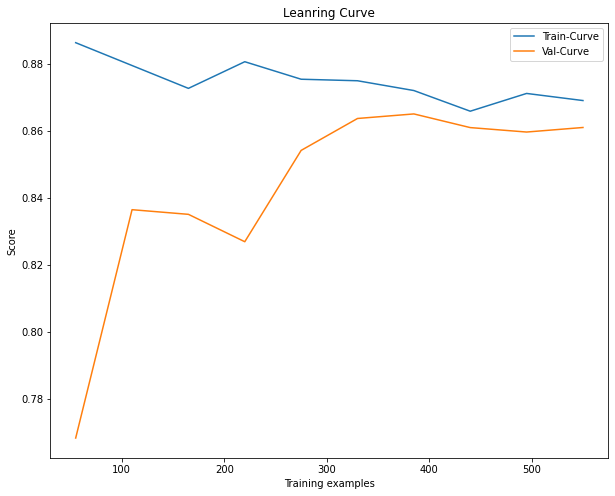

In [156]:
evaluation(estimator)

# <b>Comments:</b> 

   
    1. In this implementation, manual encoding was employed. However, for data encoding, you can utilize the 'preprocessing'          module, which can simplify the process.
    
    2. LogisticRegression has shown better results, indicating its potential for further optimization to enhance performance